# Исследовательский анализ данных сервиса Яндекс Афиша и проверка гипотез
- Автор: Захаров А.С.
- Дата: 07.05.2025

## Цели и задачи проекта

<font color='#777778'>Цель проекта, провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.</font>

## Описание данных

<font color='#777778'>Данные содержат информацию о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. 
Данные представлены тремя датасетами: final_tickets_orders_df.csv, final_tickets_events_df.csv и final_tickets_tenge_df.csv.
    
final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. 

Датасет содержит такие поля:    
- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.
- days_since_prev - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск. 

final_tickets_events_df.csv содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.
    
Датасет содержит такие поля:
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.
    
final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. 
    
Датасет содержит такие поля:
- nominal — номинал (100 тенге).
- data — дата.
- curs — курс тенге к рублю.
- cdx — обозначение валюты (kzt).
</font>

## Содержимое проекта

<font color='#777778'>Основные шаги проекта:
1. Загрузка данных и знакомство с ними.
2. Предобработка данных и подготовка их к исследованию.
- 2.1 Проверка данных на пропуски.
- 2.2 Изучение значений в ключевых столбцах.
- 2.3 Проверка на явные и неявные дубликаты.
- 2.4 Проверка соответствия типов данных.
- 2.5 Создание дополнительных столбцов.
3. Исследовательский анализ данных.
- 3.1 Анализ распределения заказов по сегментам и их сезонные изменения.
- 3.2 Осенняя активность пользователей.
- 3.3 Популярные события и партнёры.
4. Статистический анализ данных.
5. Общий вывод и рекомендации
</font>
---

## 1. Загрузка данных и знакомство с ними

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
#Загрузка данных
orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [3]:
# Просмотр первых строк датафрейма orders 
display(orders.head(10))

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,Облачко,3,8206.70,19.0
6,6636941,00096d1f542ab2b,2024-08-15,2024-08-15 16:48:48,201953,нет,16,rub,desktop,917.83,Край билетов,4,9178.26,NaN
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,Лучшие билеты,1,955.52,NaN
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,Лучшие билеты,2,2494.73,16.0
9,6818017,000cf0659a9f40f,2024-06-20,2024-06-20 10:35:26,516728,нет,12,rub,mobile,1421.91,Лови билет!,4,17773.87,NaN


In [4]:
# Вывод информации о датафрейме
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

<font color='#777778'>Датасет 'final_tickets_orders_df.csv' содержит 14 столбцов и 290849 строк.

- Тип данных `float64`имеют три столбца. Это `revenue`, `total`, `days_since_prev`.
    Для всех столбцов, кроме `days_since_prev`, тип `float64` корректен, однако можно уменьшить разрядность до `float32` или `float16`, если значения достаточно малы и это не повлияет на точность.
    Для столбца `days_since_prev`, содержащего информацию о количестве дней с предыдущей покупки для каждого пользователя, следует использовать тип `int64`.
    
- Тип данных `object` имеют семь столбцов: 
    - `user_id`, `cinema_circuit`, `currency_code`, `device_type_canonical` и `service_name` содержат строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
    - `created_dt_msk`, `created_ts_msk` хранят информацию о дате и времени заказа. Для таких данных рекомендуется использовать тип `datetime64`.
 
- Тип данных `int64`имеют четыре столбца. Это `order_id`, `event_id`, `age_limit` и `tickets_count`.
    Для всех столбцов тип `int64` корректен, однако можно уменьшить разрядность, если значения достаточно малы и это не повлияет на точность.
    
После анализа типов данных видно, что большинстов столбцов корректно представлены. Однако для оптимизации можно использовать числовые значения с уменьшенной разрядностью, преобразовать данные столбцов `created_dt_msk`, `created_ts_msk` в тип `datetime64`. 

В ходе анализа пропущенных значений были выявлены пропуски в столбце `days_since_prev`.

In [5]:
# Просмотр первых строк датафрейма events
display(events.head(10))

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"
5,8858,08008ffd-331c-4d77-8aad-c91691f87388,спектакль,театр,№896,Каменевский регион,Глиногорск,213,2148,"Лекции по искусству ""Хоровод"" и партнеры","пер. 50 лет Победы, д. 21 к. 90"
6,8863,2dc56536-e5ae-4d3a-9f00-f39c0ebe5b65,спектакль,театр,№3977,Медовская область,Радужсвет,47,2897,"Фестиваль уличного искусства ""Начало"" Инкорпор...","алл. Урицкого, д. 4/5 к. 1/3"
7,9041,1ab79186-41a8-420e-b618-dea51afd2c6f,спектакль,театр,№3582,Светополянский округ,Глиноград,54,3922,"Творческое агентство ""Симфония"" Лтд","бул. К.Маркса, д. 8/6"
8,9942,474ca8f8-3525-4ac0-9a98-4c1045e2fa6d,спектакль,театр,№1797,Широковская область,Радужнополье,35,3975,"Кабинет Искусств ""История"" и партнеры","пр. Гайдара, д. 4 к. 7/1"
9,9992,e36939d8-ef42-4f64-bd72-5a4199dd98f5,спектакль,театр,№1774,Тепляковская область,Горнодолинск,43,3959,"Эстетика ""Rhythm"" Инкорпорэйтед","ш. Вахитова, д. 7/8"


In [6]:
# Вывод информации о датафрейме
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


<font color='#777778'>
    <font color='#777778'>Датасет 'final_tickets_events_df.csv' содержит 11 столбцов и 22427 строк.
    
- Тип данных `object` имеют восемь столбцов: 
    - `event_name`, `event_type_description`, `event_type_main`, `organizers`, `region_name`, `city_name`, `venue_name`, `venue_address`содержат строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
        
- Тип данных `int64`имеют три столбца. Это `event_id`, `city_id`, `venue_id`.
    Для всех столбцов тип `int64` корректен, однако можно уменьшить разрядность, если значения достаточно малы и это не повлияет на точность.
    
После анализа типов данных видно, что все столбцы корректно представлены. Однако для оптимизации можно использовать числовые значения с уменьшенной разрядностью. 

В ходе анализа пропущенных значений были выявлены пропусков не обнаружено.
В датафрейме  final_tickets_events_df присутствует столбец city_id, отсутствующий в описании. 

In [7]:
# Просмотр первых строк датафрейма tenge
display(tenge.head(10))

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt
5,2024-01-15,100,19.4501,kzt
6,2024-01-16,100,19.4264,kzt
7,2024-01-17,100,19.4177,kzt
8,2024-01-18,100,19.5798,kzt
9,2024-01-19,100,19.5741,kzt


In [8]:
# Вывод информации о датафрейме
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


<font color='#777778'>
    <font color='#777778'>Датасет 'final_tickets_tenge_df.csv' содержит 4 столбца и 357 строк.
    
- Тип данных `object` имеют два столбца: 
    - `cdx`содержит строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
    - `data`содержит информацию о дате заказа. Для таких данных рекомендуется использовать тип `datetime64`.
        
- Тип данных `int64`имеет столбец `nominal`.
    Тип `int64` корректен, однако можно уменьшить разрядность, если значения достаточно малы и это не повлияет на точность.

- Тип данных `float64`имеет столбец `curs`.
    Тип `float64` корректен, однако можно уменьшить разрядность, если значения достаточно малы и это не повлияет на точность.
        
После анализа типов данных видно, что все столбцы корректно представлены. Однако для оптимизации можно использовать числовые значения с уменьшенной разрядностью.
        
В ходе анализа пропущенных значений были выявлены пропусков не обнаружено.

<font color='#777778'>
    На этапе предобработки данных следует:

- Преобразовать данные столбцов `created_dt_msk`, `created_ts_msk` датасета 'final_tickets_orders_df.csv'и столбец `data`датасета `final_tickets_tenge_df.csv` к типу `datetime64`.
- Объединить датафреймы для удобства в один датасет.
- Оптимизировать разрядность числовых данных.


## 2. Предобработка данных и подготовка их к исследованию.

### 2.1 Проверка данных на пропуски.

In [9]:
# Приведение дат к единому формату
orders["created_dt_msk"] = pd.to_datetime(orders["created_dt_msk"])
tenge["data"] = pd.to_datetime(tenge["data"])

# Объединение orders и events по event_id
merged_df = orders.merge(events, on="event_id", how="left")

# Объединение с курсом валют по дате заказа
merged_df = merged_df.merge(
    tenge[["data", "curs", "cdx"]],
    left_on=merged_df["created_dt_msk"].dt.date,
    right_on=tenge["data"].dt.date,
    how="left"
)

# Удаление лишних колонок после объединения
merged_df.drop(columns=["key_0", "data"], inplace=True)

# Проверка изменений
display(merged_df.head(10))

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.6648,kzt
5,2613713,000898990054619,2024-10-23,2024-10-23 15:12:00,500862,нет,12,rub,mobile,902.74,...,концерты,№1020,Лугоградская область,Кристалевск,193.0,930.0,"Школа живописи ""Солнце"" Групп","бул. Отрадный, д. 4 стр. 1",20.0531,kzt
6,6636941,00096d1f542ab2b,2024-08-15,2024-08-15 16:48:48,201953,нет,16,rub,desktop,917.83,...,театр,№1825,Каменевский регион,Глиногорск,213.0,4035.0,"Выставка ремесел ""Платформа"" Групп","алл. Горняцкая, д. 573",18.7730,kzt
7,4657981,000a55a418c128c,2024-09-29,2024-09-29 19:39:12,265857,нет,12,rub,mobile,47.78,...,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",19.3741,kzt
8,4657952,000a55a418c128c,2024-10-15,2024-10-15 10:29:04,271579,нет,12,rub,mobile,74.84,...,театр,№1637,Поленовский край,Дальнозолотск,18.0,3159.0,"Клуб начинающих писателей ""Таблицы"" Групп","ул. О.Кошевого, д. 7",19.7185,kzt
9,6818017,000cf0659a9f40f,2024-06-20,2024-06-20 10:35:26,516728,нет,12,rub,mobile,1421.91,...,концерты,№1756,Широковская область,Радужнополье,35.0,4471.0,"Киновидеостудия ""Тон"" и партнеры","ул. Тихая, д. 69 стр. 669",18.0419,kzt


In [10]:
# Проверка наличия пропущенных значений
print("Пропущенные значения в merged_df:")
print(merged_df.isnull().sum())

Пропущенные значения в merged_df:
order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
curs                          0
cdx                           0
dtype: int64


<font color='#777778'>В датафрейие merged_df выявлены 238 пропусков, т.к при создании датасета 'final_tickets_orders_df.csv' из данных не исключили фильмы. В  'final_tickets_events_df' эти данные были исключены. Следует исключить пропуски из датафрейие merged_df.

In [11]:
# Исключение пропущенных значений за исключением столбца days_since_prev
merged_df = merged_df.dropna(subset=[col for col in merged_df.columns if col != "days_since_prev"])
# Проверка изменений
print(merged_df.isna().sum())  

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
curs                          0
cdx                           0
dtype: int64


### 2.2 Изучение значений в ключевых столбцах.

In [12]:
# Вывод уникальных значений для категориальных данных
categorical_columns = ["device_type_canonical", "age_limit", "currency_code", "event_type_main", "service_name", "event_type_description"]
for col in categorical_columns:
    print(f"Уникальные значения в {col}:")
    print(merged_df[col].unique())
    print("-" * 40)

Уникальные значения в device_type_canonical:
['mobile' 'desktop']
----------------------------------------
Уникальные значения в age_limit:
[16  0 18 12  6]
----------------------------------------
Уникальные значения в currency_code:
['rub' 'kzt']
----------------------------------------
Уникальные значения в event_type_main:
['театр' 'выставки' 'другое' 'стендап' 'концерты' 'спорт' 'ёлки']
----------------------------------------
Уникальные значения в service_name:
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']
---------

<font color='#777778'>В датафрейие merged_df не встречаются значения, которые могут обозначать пропуски в данных или отсутствие информации.

In [13]:
# Вычисление основных статистик по столбцу tickets_count
stat = merged_df.groupby("currency_code")["tickets_count"].describe()
display(stat)

,count,mean,std,min,25%,50%,75%,max
currency_code,,,,,,,,
kzt,5069.0,2.762872,1.115558,1.0,2.0,3.0,4.0,6.0
rub,285542.0,2.754159,1.171575,1.0,2.0,3.0,4.0,57.0


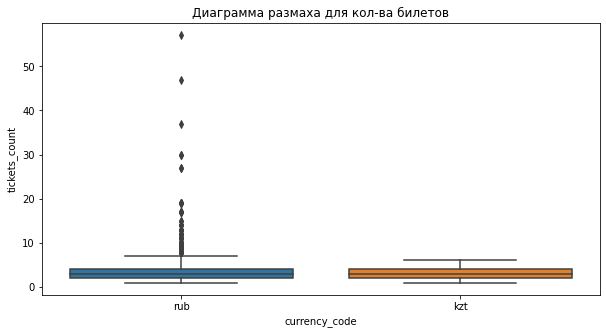

In [14]:
# Диаграммы размаха кол-ва билетов в заказе
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x="currency_code", y="tickets_count")
plt.title("Диаграмма размаха для кол-ва билетов")
plt.show()

<font color='#777778'>
Анализ выбросов по кол-ву билетов:

- Средние значения близки друг к другу (2.76 билета для KZT и 2.75 - для RUB).
- Медианное значение для KZT и RUB равно 3,0 билета, что близко к средним значениям, что говорит об отсутствии выбросов в данных.
- Стандартное отклонение не слишком велико (1.11 билета для KZT и 1.17 - для RUB), что также говорит об отсутствии выбросов.
- Верхние границы (75-й перцентиль) вполне логичны: 4 билета в заказе для большинства случаев.
- Максимальное значение для KZT 6.0 билетов, для RUB - 57.0 билетов. Значения превышающие верхний квартиль диаграммы количества заказов скорее всего относятся к корпоративным покупкам и их не стоит относить к выбросам.

In [15]:
# Вычисление основных статистик по столбцу revenue
stat = merged_df.groupby("currency_code")["revenue"].describe()
display(stat)

,count,mean,std,min,25%,50%,75%,max
currency_code,,,,,,,,
kzt,5069.0,4995.206767,4916.752776,0.00,518.10,3698.83,7397.66,26425.86
rub,285542.0,548.013929,871.750181,-90.76,114.17,346.63,793.32,81174.54


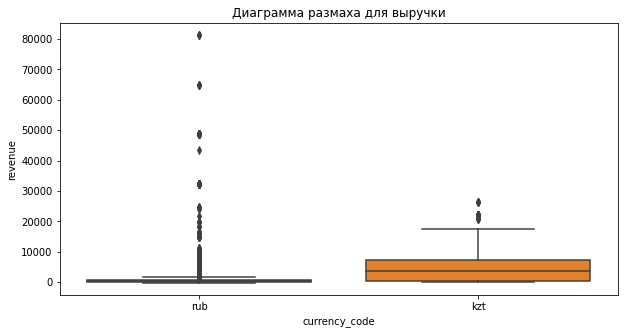

In [16]:
# Диаграммы размаха выручки для RUB и KZT
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df, x="currency_code", y="revenue")
plt.title("Диаграмма размаха для выручки")
plt.show()


<font color='#777778'>
Анализ выбросов по выручке:
    
- Для KZT:
Средняя выручка 4995 тенге, но максимальное значение 26425 тенге, что может быть выбросом.
- Для RUB:
Средняя выручка 548 рублей, но максимальное значение 81174 рублей — выглядит как явный выброс.
- Стандартное отклонение слишком высокие (4995.21 для KZT и 548.01 для RUB), что также указывает на наличие выбросов.

In [17]:
# Определяем 99-й процентиль для каждой валюты отдельно
percentile_99_rub = merged_df[merged_df["currency_code"] == "rub"]["revenue"].quantile(0.99)
percentile_99_kzt = merged_df[merged_df["currency_code"] == "kzt"]["revenue"].quantile(0.99)

# Фильтруем данные раздельно
filtered_rub = merged_df[(merged_df["currency_code"] == "rub") & (merged_df["revenue"] <= percentile_99_rub)]
filtered_kzt = merged_df[(merged_df["currency_code"] == "kzt") & (merged_df["revenue"] <= percentile_99_kzt)]

# Объединяем обратно
filtered_df = pd.concat([filtered_rub, filtered_kzt])

### 2.3 Проверка на явные и неявные дубликаты.

In [18]:
# Проверка на явные дубликаты
duplicates_count = filtered_df.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates_count}")

Количество явных дубликатов: 0


In [19]:
# Определение списка столбцов для проверки дубликатов (исключаем order_id)
columns_to_check = filtered_df.columns.difference(["order_id"])

# Поиск повторяющихся записей по всем параметрам, кроме `order_id`
duplicate_mask = filtered_df.duplicated(subset=columns_to_check, keep=False)

# Отбор строк с возможными дубликатами
duplicates_df = filtered_df[duplicate_mask]

# Вывод количества найденных дубликатов
print(f"Найдено возможных неявных дубликатов (без order_id): {duplicates_df.shape[0]}")


Найдено возможных неявных дубликатов (без order_id): 58


<font color='#777778'>
Следует исключить данные неявные дубликаты, т.к вероятность, что один и тот же пользователь оформил заказ в тот же промежуток времени отсутствует. Вероятно, мы имеем дело с дубликатами заказов или ошибками данных.

In [20]:
# Удаление неявных дублмкатов
filtered_df_cleaned = filtered_df.drop_duplicates(subset=columns_to_check, keep="first").copy()

# Вывод размера датасета до и после очистки
print(f"Размер до удаления дубликатов: {filtered_df.shape[0]}")
print(f"Размер после удаления дубликатов: {filtered_df_cleaned.shape[0]}")

Размер до удаления дубликатов: 287782
Размер после удаления дубликатов: 287752


### 2.4 Проверка соответствия типов данных.

In [21]:
# Преобразование created_ts_msk в datetime
filtered_df_cleaned["created_ts_msk"] = pd.to_datetime(filtered_df_cleaned["created_ts_msk"], errors="coerce")

# Понижение разрядности числовых данных
numeric_columns = ["order_id", "event_id", "age_limit", "tickets_count", "city_id", "venue_id", "revenue", "total", "curs"]
for col in numeric_columns:
    filtered_df_cleaned[col] = pd.to_numeric(filtered_df_cleaned[col], downcast="integer") if filtered_df_cleaned[col].dtype == "int64" else pd.to_numeric(filtered_df_cleaned[col], downcast="float")

# Проверка изменений
print(filtered_df_cleaned.dtypes)


order_id                           int32
user_id                           object
created_dt_msk            datetime64[ns]
created_ts_msk            datetime64[ns]
event_id                           int32
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float32
service_name                      object
tickets_count                       int8
total                            float32
days_since_prev                  float64
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                          float32
venue_id                         float32
venue_name                        object
venue_address                     object
curs            

### 2.5 Создание дополнительных столбцов.

In [22]:
# Создаем новый столбец revenue_rub
filtered_df_cleaned["revenue_rub"] = filtered_df_cleaned["revenue"]

# Конвертация тенге в рубли
filtered_df_cleaned.loc[filtered_df_cleaned["currency_code"] == "kzt", "revenue_rub"] = (
    filtered_df_cleaned["revenue"] / 100
) * filtered_df_cleaned["curs"]

In [23]:
# Выручка с одного билета
filtered_df_cleaned["one_ticket_revenue_rub"] = filtered_df_cleaned["revenue_rub"] / filtered_df_cleaned["tickets_count"]

In [24]:
# Выделение месяца из даты оформления заказа
filtered_df_cleaned["month"] = filtered_df_cleaned["created_dt_msk"].dt.month

In [25]:
# Создание нового столбца season
filtered_df_cleaned["season"] = ""

# Используем цикл для установки значения сезона по месяцу
for index, row in filtered_df_cleaned.iterrows():
    month = row["month"]
    
    if month in [12, 1, 2]:
        filtered_df_cleaned.at[index, "season"] = "зима"
    elif month in [3, 4, 5]:
        filtered_df_cleaned.at[index, "season"] = "весна"
    elif month in [6, 7, 8]:
        filtered_df_cleaned.at[index, "season"] = "лето"
    elif month in [9, 10, 11]:
        filtered_df_cleaned.at[index, "season"] = "осень"

In [26]:
# Проверка изменений
display(filtered_df_cleaned.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,city_id,venue_id,venue_name,venue_address,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.939941,...,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",18.697201,kzt,1521.939941,380.484985,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.450012,...,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",18.341900,kzt,289.450012,144.725006,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.569946,...,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",19.647499,kzt,1258.569946,314.642487,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.490000,...,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",18.500999,kzt,8.490000,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.410034,...,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",19.664801,kzt,1390.410034,463.470001,10,осень


In [27]:
# Определение кол-ва строк до и после фильтрации 
print(f"Исходное количество строк: {merged_df.shape[0]}")
print(f"Количество строк после фильтрации и очистки: {filtered_df_cleaned.shape[0]}")
# Подсчёт процента удаленных строк
deleted_percentage = ((merged_df.shape[0] - filtered_df_cleaned.shape[0]) / merged_df.shape[0]) * 100

# Вывод результата
print(f"Процент удаленных данных: {deleted_percentage:.2f}%")

Исходное количество строк: 290611
Количество строк после фильтрации и очистки: 287752
Процент удаленных данных: 0.98%


<font color='#777778'> В ходе предобработки данных, было выполнено следующее: 
    
- Очистка пропущенных значений (удаление NaN, кроме days_since_prev). 
- Удаление явных и неявных дубликатов (по ключевым характеристикам заказа, исключая order_id).
- Фильтрация выбросов по revenue (отбор значений ниже 99-го процентиля). 
- Приведение типов данных (created_ts_msk и created_dt_msk в datetime64[ns], days_since_prev в Int64, оптимизация разрядности числовых колонок). 
- Создание новых столбцов:
 - revenue_rub - перевод выручки в рубли по курсу.
 - one_ticket_revenue_rub - расчет выручки за один билет.
 - month - выделение месяца оформления заказа.
 - season - определение сезона заказа через цикл.

## 3. Исследовательский анализ данных.

### 3.1 Анализ распределения заказов по сегментам и их сезонные изменения.

month
6     34164
7     40407
8     44550
9     69352
10    99279
Name: order_id, dtype: int64

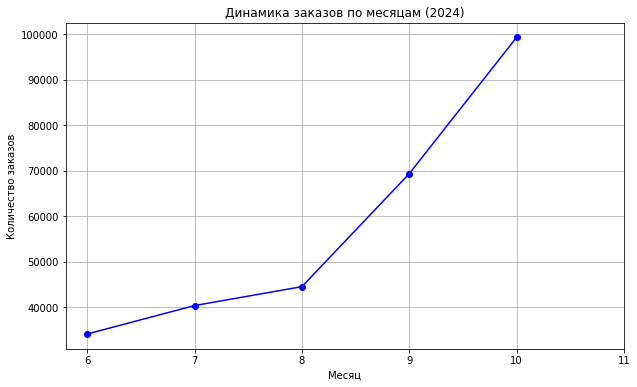

In [28]:
# Группировка данных по месяцам
monthly_orders = filtered_df_cleaned.groupby("month")["order_id"].count()
# Вывод результатов
display(monthly_orders)

# Визуализация динамики заказов по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Месяц")
plt.ylabel("Количество заказов")
plt.title("Динамика заказов по месяцам (2024)")
plt.xticks(range(6, 12))
plt.grid(True)
plt.show()


<font color='#777778'> На графике заметен рост более чем в 3 раза кол-ва заказов от июня к ноябрю (32659 заказов в июне и 99891 в октябре).

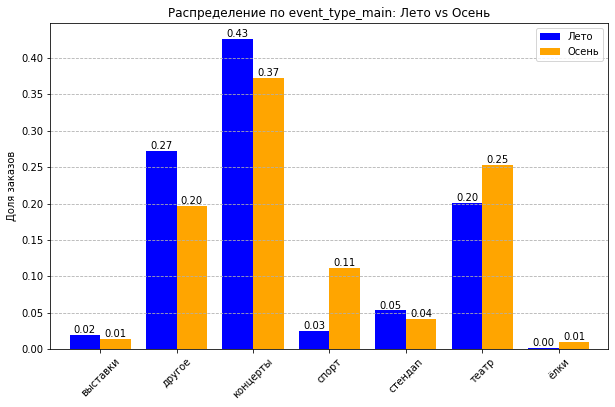

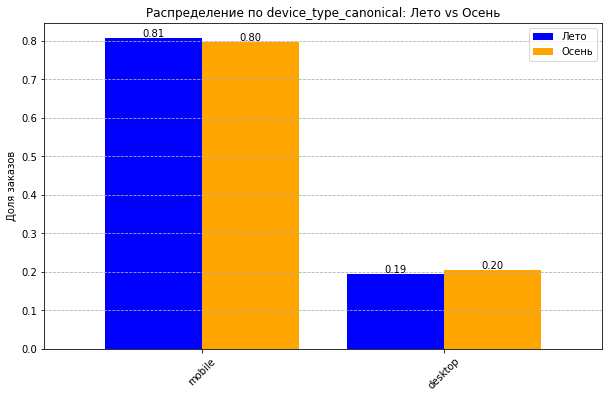

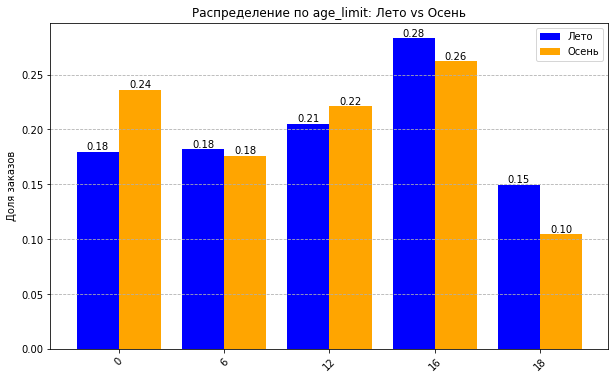

In [29]:
# Определяем лето и осень
summer_df = filtered_df_cleaned[filtered_df_cleaned["season"] == "лето"]
autumn_df = filtered_df_cleaned[filtered_df_cleaned["season"] == "осень"]

# Категории для анализа
categories = ["event_type_main", "device_type_canonical", "age_limit"]

# Построение графиков
for category in categories:
    comp_df = pd.DataFrame({
        "Лето": summer_df[category].value_counts(normalize=True),
        "Осень": autumn_df[category].value_counts(normalize=True)
    }).fillna(0)
    
    ax = comp_df.plot(kind="bar", figsize=(10, 6), color=["blue", "orange"], width=0.8)
    plt.title(f"Распределение по {category}: Лето vs Осень")
    plt.ylabel("Доля заказов")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--")

# Добавление подписей значений
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.2f}", 
                ha="center", va="bottom", fontsize=10, color="black")

    plt.show()


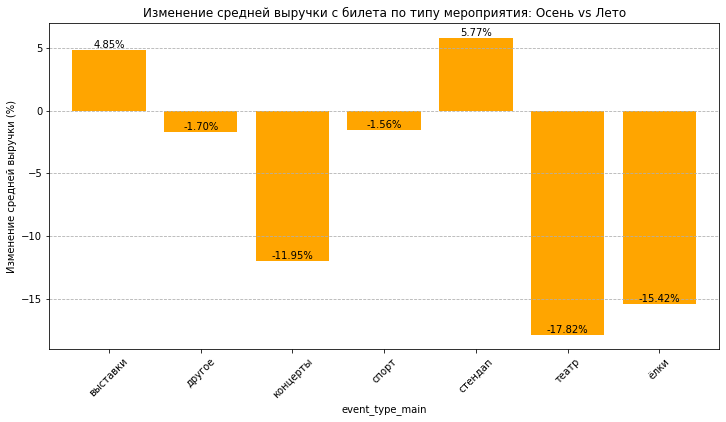

In [30]:
# Рассчитываем среднюю выручку с одного билета для каждого типа мероприятия
summer_avg_price = summer_df.groupby("event_type_main")["one_ticket_revenue_rub"].mean()
autumn_avg_price = autumn_df.groupby("event_type_main")["one_ticket_revenue_rub"].mean()

# Создаем DataFrame для сравнения
avg_price_comparison = pd.DataFrame({"Лето": summer_avg_price, "Осень": autumn_avg_price})

# Рассчитываем относительное изменение
avg_price_comparison["Изменение (%)"] = (avg_price_comparison["Осень"] / avg_price_comparison["Лето"] - 1) * 100

# Построение графика изменений
fig, ax = plt.subplots(figsize=(12, 6))
avg_price_comparison["Изменение (%)"].plot(kind="bar", ax=ax, color="orange", width=0.8)
ax.set_ylabel("Изменение средней выручки (%)")
ax.set_title("Изменение средней выручки с билета по типу мероприятия: Осень vs Лето")
plt.xticks(rotation=45)
ax.grid(axis="y", linestyle="--")

# Добавление подписей значений
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.2f}%", 
            ha="center", va="bottom", fontsize=10, color="black")

plt.show()


<font color='#777778'> В зависимости от типа мероприятий от лета к осени заметно:
- падение доли выставок (с 0,02 до 0,01), другого (с 0,28 до 0,20), концертов (с 0,42 до 0,37), стендапа (с 0,05 до 0,04), 
- рост доли спорта (с 0,03 до 0,11), театра (с 0,20 до 0,25), ёлок (с 0,00 до 0,01).
    
Доли мобильных устройств от лета к осени стабильны от 0,81 до 0,80 от общего числа устройств, для десктопных устройств –от 0,19 до 0,20. 

В зависимости от возрастного ограничения мероприятия от лета к осени заметно:
- падение доли для возраста 6 (с 0,19 до 0,18), 16 лет (с 0,28 до 0,26), 18 лет (с 0,15 до 0,10).
- рост доли для возраста 0 (с 0,18 до 0,24), 12 лет (с 0,20 до 0,22).

В зависимости от типа мероприятий от лета к осени заметно:
- рост средней выручки с одного билета для выставок на 5,38%, стендапа на 5,13%, 
- падение средней выручки с одного билета для другого на 4,53%, спорта на 3,82%, концертов на 7,91%, театра на 17,82%, ёлок на 14,75%.

### 3.2 Осенняя активность пользователей.

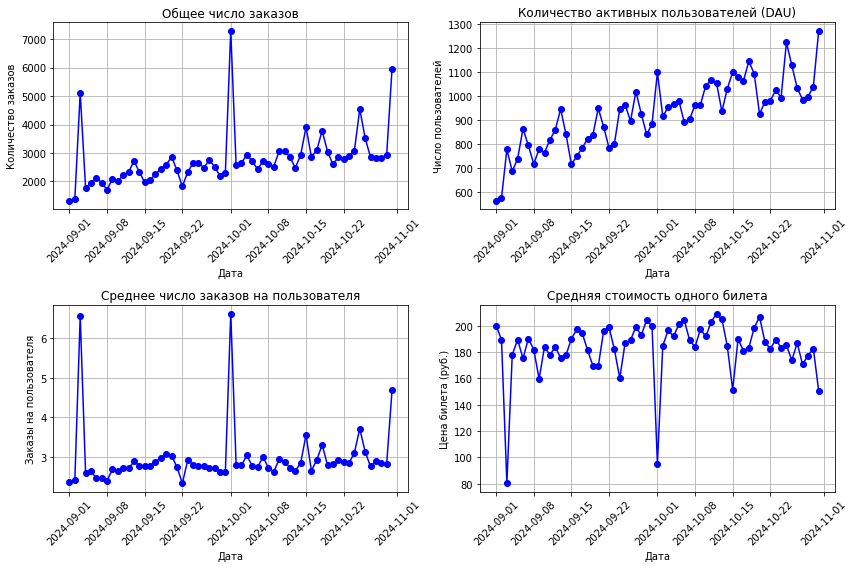

In [31]:
# Фильтруем данные только за осенние месяцы (сентябрь и октябрь)
autumn_df = filtered_df_cleaned[filtered_df_cleaned["season"] == "осень"]

# Группировка данных по дням
daily_orders = autumn_df.groupby("created_dt_msk")["order_id"].count()
daily_users = autumn_df.groupby("created_dt_msk")["user_id"].nunique()

# Создание сводной таблицы
daily_stat = pd.DataFrame({
    "total_orders": daily_orders,
    "dau": daily_users,
    "avg_orders_per_user": daily_orders / daily_users,  
    "avg_ticket_price": autumn_df.groupby("created_dt_msk")["one_ticket_revenue_rub"].mean()
}).reset_index()

# Определяем метрики и заголовки
metrics = ["total_orders", "dau", "avg_orders_per_user", "avg_ticket_price"]
titles = [
    "Общее число заказов",
    "Количество активных пользователей (DAU)",
    "Среднее число заказов на пользователя",
    "Средняя стоимость одного билета"
]
y_labels = [
    "Количество заказов",
    "Число пользователей",
    "Заказы на пользователя",
    "Цена билета (руб.)"
]

# Построение графиков
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.plot(daily_stat["created_dt_msk"], daily_stat[metric], marker="o", linestyle="-", color="blue")
    plt.title(titles[i])
    plt.xlabel("Дата")
    plt.ylabel(y_labels[i]) 
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
# Делаем копию данных, чтобы избежать предупреждения
autumn_df = filtered_df_cleaned[filtered_df_cleaned["season"] == "осень"].copy()

# Добавляем числовой день недели
autumn_df["weekday"] = pd.to_datetime(autumn_df["created_dt_msk"]).dt.weekday

# Группировка данных по дням недели
daily_orders = autumn_df.groupby("weekday")["order_id"].count()
daily_users = autumn_df.groupby("weekday")["user_id"].nunique()

# Создание таблицы
weekly_stats = pd.DataFrame({
    "weekday": daily_orders.index,  
    "total_orders": daily_orders.values,
    "dau": daily_users.values,
    "avg_orders_per_user": daily_orders.values / daily_users.values 
}).reset_index(drop=True)

# Замена числа на названия дней недели
weekly_stats["weekday"] = weekly_stats["weekday"].replace({
    0: "Понедельник", 1: "Вторник", 2: "Среда", 3: "Четверг", 
    4: "Пятница", 5: "Суббота", 6: "Воскресенье"
})

# Вывод изменений
display(weekly_stats)

,weekday,total_orders,dau,avg_orders_per_user
0,Понедельник,21515,4446,4.839181
1,Вторник,31490,4794,6.568627
2,Среда,22891,4815,4.754102
3,Четверг,27167,4970,5.466197
4,Пятница,24835,4870,5.099589
5,Суббота,21342,4574,4.665938
6,Воскресенье,19391,4395,4.412059


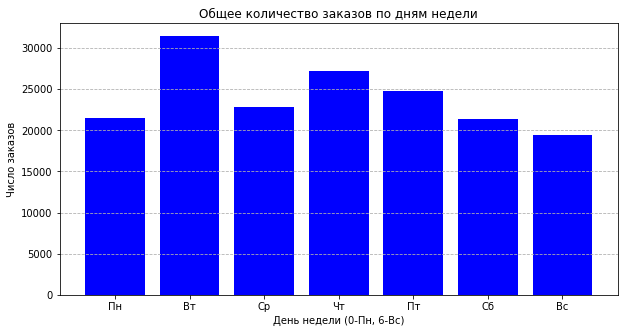

In [33]:
# Визуализация активности по дням недели
plt.figure(figsize=(10, 5))
plt.bar(weekly_stats["weekday"], weekly_stats["total_orders"], color="blue")
plt.xlabel("День недели (0-Пн, 6-Вс)")
plt.ylabel("Число заказов")
plt.title("Общее количество заказов по дням недели")
plt.xticks(range(7), labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])
plt.grid(axis="y", linestyle="--")
plt.show()

<font color='#777778'> 
Количество заказов показывает существенные колебания, но явно заметен рост кол-ва заказов и DAU в течение осени. Среднее число заказов на пользователя остается стабильным, но иногда резко возрастает. Средняя стоимость билета снижается в периоды роста заказов.

Выявленный тренд:
3 сентября резкий скачок заказов (5112), но снижение стоимости билета (80.95 руб.).
1 октября резкий скачок заказов (7307), но снижение стоимости билета (96.82 руб.).
31 октября снова высокий рост заказов (5982), но снижение средней стоимости билета (152.56 руб.).

Периоды высокой активности могут быть связаны с акциями, скидками или массовыми событиями. Снижение цены билетов в моменты роста заказов может говорить о стратегии ценообразования (например, скидки для привлечения большего числа покупателей). 
    
Наибольшее количество заказов приходится на вторник (31490) и четверг (27167). Среднее число активных пользователей (DAU) стабильно в течение недели, но немного выше в будние дни. Среднее число заказов на пользователя максимально во вторник (6.57) и минимально в воскресенье (4.41). Выходные (суббота и воскресенье) показывают снижение активности по всем метрикам.

Вторник и четверг могут быть днями повышенного спроса, возможно, из-за скидок или регулярных событий. Выходные показывают снижение заказов, что может говорить о других предпочтениях пользователей в эти дни.

### 3.3. Популярные события и партнёры

In [34]:
# Группировка данных по регионам
region_stats = autumn_df.groupby("region_name").agg(
    unique_events=("event_id", "nunique"),  # Количество уникальных мероприятий
    total_orders=("order_id", "count")  # Общее количество заказов
).reset_index()

# Добавление расчётов доли для метрик
region_stats["events_share"] = region_stats["unique_events"] / region_stats["unique_events"].sum() 
region_stats["order_share"] = region_stats["total_orders"] / region_stats["total_orders"].sum()  


# Сортировка по доле заказов
region_stats = region_stats.sort_values(by="order_share", ascending=False)

# Вывод изменений
display(region_stats)

,region_name,unique_events,total_orders,events_share,order_share
23,Каменевский регион,3910,46684,0.246284,0.276841
59,Североярская область,2613,20718,0.164588,0.122860
41,Медовская область,369,12044,0.023243,0.071422
75,Широковская область,803,8715,0.050579,0.051681
44,Озернинский край,296,7526,0.018644,0.044630
...,...,...,...,...,...
47,Островогорский округ,4,18,0.000252,0.000107
78,Яснопольский округ,5,18,0.000315,0.000107
32,Крутоводский регион,5,14,0.000315,0.000083
5,Верхозёрский край,2,11,0.000126,0.000065


In [35]:
# Группируем данные по билетному оператору
operator_stats = autumn_df.groupby("service_name").agg(
    unique_events=("event_id", "nunique"),  # Количество уникальных мероприятий
    total_orders=("order_id", "count"),  # Количество обработанных заказов
    total_revenue=("revenue_rub", "sum")  # Суммарная выручка с заказов
).reset_index()

# Округляем значения выручки
operator_stats["total_revenue"] = operator_stats["total_revenue"].round(0)

# Добавление расчётов доли для метрик
operator_stats["events_share"] = region_stats["unique_events"] / region_stats["unique_events"].sum() 
operator_stats["order_share"] = operator_stats["total_orders"] / operator_stats["total_orders"].sum() 
operator_stats["revenue_share"] = operator_stats["total_revenue"] / operator_stats["total_revenue"].sum()

# Округляем значения доли выручки
operator_stats["revenue_share"] = operator_stats["revenue_share"].round(6)

# Сортируем по доле заказов
operator_stats = operator_stats.sort_values(by="order_share", ascending=False)

# Отображаем таблицу
display(operator_stats)

,service_name,unique_events,total_orders,total_revenue,events_share,order_share,revenue_share
3,Билеты без проблем,2847,32405,12172563.0,0.004787,0.192165,0.148643
21,Лови билет!,3616,25794,10381935.0,0.008755,0.152961,0.126777
5,Билеты в руки,2469,25728,7613384.0,0.000126,0.152570,0.092969
24,Мой билет,1005,19416,10850676.0,0.001638,0.115139,0.132501
25,Облачко,1409,15478,10611052.0,0.011023,0.091786,0.129575
22,Лучшие билеты,1396,12432,1676010.0,0.018959,0.073723,0.020466
8,Весь в билетах,599,9416,9351279.0,0.002079,0.055838,0.114191
26,Прачечная,728,5798,2548310.0,0.003086,0.034383,0.031118
30,Тебе билет!,859,3760,2166179.0,0.000315,0.022297,0.026452
34,Яблоко,537,3473,2763332.0,0.000882,0.020595,0.033744


<font color='#777778'> 

Явные лидеры по количеству мероприятий и заказов среди регионов:

- Каменевский регион — 3910 мероприятий (24.6%), 46 684 заказов (27.7% всех заказов)

- Североярская область — 2613 мероприятий (16.4%), 20 718 заказов (12.3%)

- Медовская область — 369 мероприятий (2.3%), 12 044 заказов (7.1%)

Эти регионы значительно опережают остальные по числу заказов и событий. Каменевский регион особенно выделяется — он генерирует более четверти всех заказов.

Регионы с низкой активностью:

- Сосноводолинская область — 1 мероприятие (0.006%), 9 заказов (0.005%)

- Верхозёрский край — 2 мероприятия (0.03%), 11 заказов (0.006%)

- Крутоводский регион — 5 мероприятий (0.01%), 14 заказов (0.008%)

Эти регионы почти не участвуют в билетных продажах, их вклад минимален.

    
Лидеры по количеству заказов и выручке среди билетных операторов:

- Билеты без проблем — 32 405 заказов (19.2%), 12.18 млн руб (14.9%).

- Лови билет! — 25 794 заказов (15.3%), 10.38 млн руб (12.7%).

- Билеты в руки — 25 728 заказов (15.2%), 7.61 млн руб (9.3%).

Эти три оператора обрабатывают почти половину всех заказов и обеспечивают основную часть выручки.

Операторы с низкой активностью:

- Лимоны — 1 заказ (0.0006%), 120 руб (0.0001%). 

- Зе Бест! — 2 заказа (0.0012%), 30 руб. (0.00001%)

- Билеты в интернете — 4 заказа (0.0024%), 548 руб. (0.0007%)

Эти операторы почти не участвуют в продажах, их доля менее 0.01%.

### 4. Статистический анализ данных.

#### Гипотеза о среднем количестве заказов

In [36]:
# Группируем данные на уровне пользователя, считая количество заказов отдельно по платформам
user_orders = autumn_df.groupby(["device_type_canonical", "user_id"])["order_id"].count().reset_index()

# Переименовываем столбец `order_id` → `user_order_count`
user_orders.rename(columns={"order_id": "user_order_count"}, inplace=True)

# Разделяем данные по платформам
mobile_orders = user_orders[user_orders["device_type_canonical"] == "mobile"]["user_order_count"]
desktop_orders = user_orders[user_orders["device_type_canonical"] == "desktop"]["user_order_count"]

# Выводим статистику по количеству заказов на пользователя
print("\nСтатистика заказов на пользователя для мобильных устройств:")
print(mobile_orders.describe())

print("\nСтатистика заказов на пользователя для стационарных устройств:")
print(desktop_orders.describe())



Статистика заказов на пользователя для мобильных устройств:
count    14192.000000
mean         9.465051
std         68.048019
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4333.000000
Name: user_order_count, dtype: float64

Статистика заказов на пользователя для стационарных устройств:
count    4868.000000
mean        7.046631
std        35.987323
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1502.000000
Name: user_order_count, dtype: float64


<font color='#777778'>
ОБщее количество мобильных пользователей составляет 14192 против 4868 у стационарных пользователей (в 2,9 раз больше). 
Среднее число заказов на пользователя выше у мобильных - 9.47 против 7.05 у стационарных пользователей.
Медианное значение для обеих групп - 2 заказа на пользователя, но разница между средним и медианным значением говорит о наличии выбросов в данных.
Высокое стандартное отклонение у мобильных пользователей 68.05 против 35.99 у стационарных пользователей также говорит о выбросах в данных. 
Максимальное число заказов у мобильных пользователей - 4333, против 1502 у стационарных пользователей. Такие высокие максимальные значения могут говорить о наличии корпоративных клиентов. 

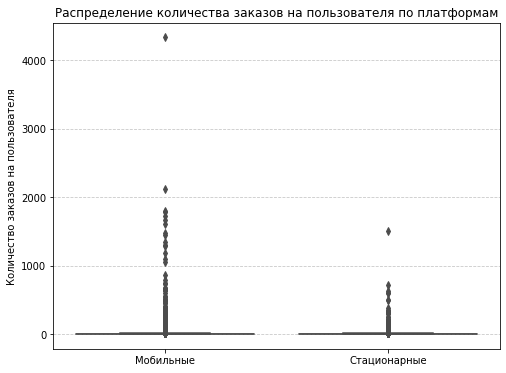

In [37]:
# Создаем график для определения выбросов в данных
plt.figure(figsize=(8, 6))

# Строим boxplot для мобильных и стационарных пользователей
sns.boxplot(data=[mobile_orders, desktop_orders], palette=["blue", "orange"])

# Настройки графика
plt.xticks([0, 1], ["Мобильные", "Стационарные"])  # Подписи оси X
plt.ylabel("Количество заказов на пользователя")  # Подпись оси Y
plt.title("Распределение количества заказов на пользователя по платформам")  # Заголовок
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Горизонтальная сетка

# Показываем график
plt.show()

<font color='#777778'> 
Согласно графиков, данные для мобильных и стационарных устройств имеют левостороннее распределение и длинные правосторонние хвосты. Для проверки гипотезы оптимальным выбором является U-тест Манна-Уитни, т.к. проверяет различие между распределениями двух независимых выборок, не требует нормального распределения и устойчив к выбросам.

<font color='#777778'> 
Формулировка гипотез:
    
- Нулевая гипотеза (H₀): Среднее количество заказов на пользователя у мобильных пользователей не выше, чем у стационарных пользователей.

- Альтернативная гипотеза (H₁): Среднее количество заказов на пользователя выше у мобильных пользователей.

In [38]:
# Проведение U-теста Манна-Уитни
u_test_result = stats.mannwhitneyu(
    mobile_orders, 
    desktop_orders, 
    alternative="greater")

In [39]:
print("\nРезультат U-теста Манна-Уитни для числа заказов на пользователя:", u_test_result)
if u_test_result.pvalue < 0.05:
    print("p-value < 0.05. Отвергаем H₀. Среднее число заказов на пользователя у мобильных значимо больше.")
else:
    print("p-value > 0.05. Не отвергаем H₀. Различия незначимы.")


Результат U-теста Манна-Уитни для числа заказов на пользователя: MannwhitneyuResult(statistic=36111903.0, pvalue=3.824199223903784e-07)
p-value < 0.05. Отвергаем H₀. Среднее число заказов на пользователя у мобильных значимо больше.


#### Гипотеза о среднем времени между заказами

In [40]:
# Выводим статистику по количеству заказов для каждой группы
print("\nСтатистика времени между заказами для мобильных пользователей:")
print(autumn_df[autumn_df["device_type_canonical"] == "mobile"]["days_since_prev"].describe())

print("\nСтатистика времени между заказами для стационарных пользователей:")
print(autumn_df[autumn_df["device_type_canonical"] == "desktop"]["days_since_prev"].describe())


Статистика времени между заказами для мобильных пользователей:
count    127340.000000
mean          3.778577
std          13.381619
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

Статистика времени между заказами для стационарных пользователей:
count    32945.000000
mean         3.025254
std         12.095335
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        146.000000
Name: days_since_prev, dtype: float64


<font color='#777778'> 
Среднее время между заказами выше у мобильных пользователей - 3.78 против 3.02 дней у стационарных пользователей. 
Стандартное отколонение высокое, что говорит о большом разбросе данных.
Максимальные значения схожи - 148 дней (мобильные) против 146 дней (стационарные), что говорит о наличии пользователей с очень редкими заказами.

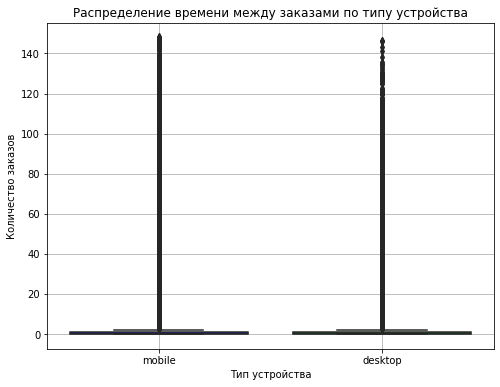

In [41]:
# Создаем график для определения выбросов в данных
plt.figure(figsize=(8, 6))

# Строим boxplot для сравнения времени между заказами по типу устройства
sns.boxplot(x=autumn_df["device_type_canonical"], y=autumn_df["days_since_prev"], palette=["blue", "green"])

# Настройки графика
plt.title("Распределение времени между заказами по типу устройства")
plt.xlabel("Тип устройства")
plt.ylabel("Количество заказов")
plt.grid(True)

# Показываем график
plt.show()


<font color='#777778'> Согласно графиков, данные для мобильных и стационарных устройств имеют левостороннее распределение и длинные правосторонние хвосты. Для проверки гипотезы оптимальным выбором является U-тест Манна-Уитни, т.к. проверяет различие между распределениями двух независимых выборок, не требует нормального распределения и устойчив к выбросам.

<font color='#777778'> 
Формулировка гипотез для среднего времени между заказами выше у пользователей мобильных приложений:
    
- Нулевая гипотеза (H₀): Средний интервал между заказами одинаковый для мобильных пользователей не выше, чем у стационарных устройств.

- Альтернативная гипотеза (H₁): Средний интервал между заказами больше у мобильных пользователей.

In [42]:
# Односторонний U-тест Манна-Уитни
u_test_result = stats.mannwhitneyu(
    autumn_df[autumn_df["device_type_canonical"] == "mobile"]["days_since_prev"].dropna(),
    autumn_df[autumn_df["device_type_canonical"] == "desktop"]["days_since_prev"].dropna(),
    alternative="greater" 
)

print("Результат U-теста Манна-Уитни:", u_test_result)
if u_test_result.pvalue < 0.05:
    print("p-value < 0.05. Отвергаем H₀. Среднее время между заказами у мобильных пользователей значимо больше.")
else:
    print("p-value > 0.05. Не отвергаем H₀. Различия незначимы.")


Результат U-теста Манна-Уитни: MannwhitneyuResult(statistic=2220608137.0, pvalue=3.4995259314748344e-92)
p-value < 0.05. Отвергаем H₀. Среднее время между заказами у мобильных пользователей значимо больше.



### 5. Общий вывод и рекомендации

 <font color='#777778'>
    В данном проекте мы работали с данными, содержащими информацию о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. 
    На этапе предобработки данных понизили разрядность числовых данных, исключили пропущенные значения, явные и неявные дубликаты, создали новые столбцы для удобства расчётов. 
    На этапе исследовательского анализа данных определили, что наиболее востребованы концертные мероприятия. Их доля составляет около 40%.
    
 В зависимости от типа мероприятий от лета к осени заметно:
- падение доли выставок, другого, концертов, стендапа, 
- рост доли спорта, театра, ёлок.
    
Доли мобильных устройств от лета к осени стабильны около 0,80 от общего числа устройств, для десктопных устройств – около 0,20. 
    
В зависимости от типа мероприятий от лета к осени заметно:
- рост средней выручки с одного билета для выставок на 5,38%, стендапа на 5,13%, 
- падение средней выручки с одного билета для другого на 4,53%, спорта на 3,82%, концертов на 7,91%, театра на 17,82%, ёлок на 14,75%.

Количество заказов показывает существенные колебания, но явно заметен рост кол-ва заказов и DAU в течение осени. Среднее число заказов на пользователя остается стабильным, но иногда резко возрастает. Средняя стоимость билета снижается в периоды роста заказов.
    
Периоды высокой активности могут быть связаны с акциями, скидками или массовыми событиями. Снижение цены билетов в моменты роста заказов может говорить о стратегии ценообразования (например, скидки для привлечения большего числа покупателей).
    
Вторник и четверг могут быть днями повышенного спроса, возможно, из-за скидок или регулярных событий.

Рынок сильно сконцентрирован вокруг нескольких ключевых регионов и операторов.
    Каменевский регион, Североярская область и Медовская область  — главные регионы продаж. 
    Билеты без проблем, Лови билет!, Билеты в руки - главные операторы продаж.

На этапе статистического анализа данных проверили две гипотезы:
    
1.Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
    U-теста Манна-Уитни для количества заказов определили pvalue=3.824199223903784e-07
p-value < 0.05. Следовательно, отвергли нулевую гипотезу, и подтвердили гипотезу, что пользователи мобильных устройств совершают большее кол-во заказов, чем стационарные пользователи. 
               
2.Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
    По результатам U-теста Манна-Уитни для среднего времени между заказами определили pvalue=1.7191361665268777e-94
p-value < 0.05. Следовательно, отвергли нулевую гипотезу, и подтвердили гипотезу, что среднее время между заказами у мобильных пользователей значимо больше, чем у стационарных пользователей.

 <font color='#777778'> 
    Рекомендации:
    
 1. Использовать акции и скидки в периоды высокой активности пользователей. 
 2. Акцентировать внимание на вторник и четверг - эти дни показывают повышенный спрос, возможно, из-за скидок или регулярных событий.
 3. Стоит оптимизировать мобильное приложение, улучшить интерфейс и удобство оплаты. 
 4. Среднее время между заказами у мобильных пользователей выше - можно увеличить вовлеченность, предлагая персонализированные рекомендации и уведомления о скидках.
 5.Падение средней выручки с билетов на концерты и театр - стоит пересмотреть ценообразование и анализировать причины снижения спроса. 
 6. Сконцентрировать усилия на ключевых регионах - Каменевский регион, Североярская область и Медовская область. 
 7. Усилить сотрудничество с ведущими операторами - "Билеты без проблем", "Лови билет!", "Билеты в руки".